# ML102 - Linear Regression

## 1. Demo - Univariate Regression

### 1.1. Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.datasets import load_diabetes

### 1.2. Generate linear data with noise

Note: Here you would normally ingest data you sourced or are provided, and clean it using skills learned in e.g. Data Wrangling 101

In [2]:
np.random.seed(42)
n = 100
x = np.random.uniform(0, 10, n)
y = 0.5 * x + np.random.randn(n)

In [3]:
x, y

(array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
        1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
        0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
        1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
        6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
        7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
        6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
        8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
        1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
        6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456,
        9.69584628, 7.75132823, 9.39498942, 8.9482735 , 5.97899979,
        9.21874235, 0.88492502, 1.95982862, 0.45227289, 3.25330331,
        3.8867729 , 2.71349032, 8.28737509, 3.56753327, 2.8093451 ,
        5.42696083, 1.40924225, 8.02196981, 0.74550644, 9.86886937,
        7.72244769, 1.98715682, 0.05522117, 8.15

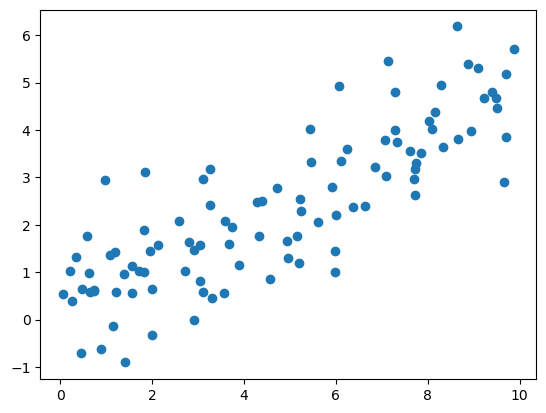

In [4]:
plt.scatter(x, y);

In [5]:
#reshape arrays so that they look like [[instance 0], [instance 1], etc]
x = x.reshape(-1,1)
y = y.reshape(-1,1)

x, y

(array([[3.74540119],
        [9.50714306],
        [7.31993942],
        [5.98658484],
        [1.5601864 ],
        [1.5599452 ],
        [0.58083612],
        [8.66176146],
        [6.01115012],
        [7.08072578],
        [0.20584494],
        [9.69909852],
        [8.32442641],
        [2.12339111],
        [1.81824967],
        [1.8340451 ],
        [3.04242243],
        [5.24756432],
        [4.31945019],
        [2.9122914 ],
        [6.11852895],
        [1.39493861],
        [2.92144649],
        [3.66361843],
        [4.56069984],
        [7.85175961],
        [1.99673782],
        [5.14234438],
        [5.92414569],
        [0.46450413],
        [6.07544852],
        [1.70524124],
        [0.65051593],
        [9.48885537],
        [9.65632033],
        [8.08397348],
        [3.04613769],
        [0.97672114],
        [6.84233027],
        [4.40152494],
        [1.22038235],
        [4.9517691 ],
        [0.34388521],
        [9.09320402],
        [2.58779982],
        [6

### 1.3. Split dataset into train and test subsets

In this example it will be indicative as we know the form of the data, but in practice we don't and need to make sure we're not training on the data we used to test the model (this is *data leakage*)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((70, 1), (30, 1), (70, 1), (30, 1))

### 1.4. Fit a Linear Regression model to the training data

Scikit-learn makes it easy to create model instances. Check out [Scikit-learn's Linear Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for more information on the class' methods and attributes.

In [8]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [9]:
print(f'Our regression model is y = {model.intercept_[0]:.3f} + {model.coef_[0,0]:.3f} X + \N{GREEK SMALL LETTER EPSILON}')

Our regression model is y = 0.118 + 0.453 X + ε


### 1.5. Check the results

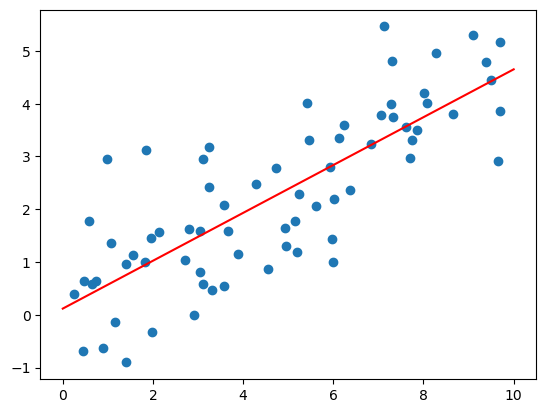

In [10]:
plt.scatter(x_train, y_train)
plt.plot(np.linspace(0, 10, n), model.predict(np.linspace(0, 10, n).reshape(-1,1)), c='r');

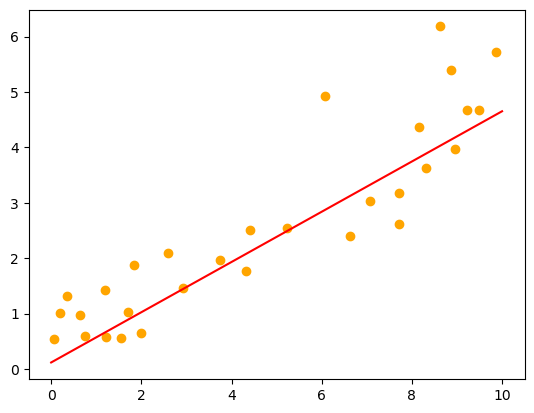

In [11]:
plt.scatter(x_test, y_test, c = 'orange')
plt.plot(np.linspace(0, 10, n), model.predict(np.linspace(0, 10, n).reshape(-1,1)), c='r');

### 1.6. Evaluate the model

While Linear Regression uses mean squared error on the training set, we can use the root mean squared error on the test set (which the model wasn't trained on) to evaluate how good the fit is

In [12]:
y_pred = model.predict(x_test)

print(root_mean_squared_error(y_test, y_pred))

0.7943233357920844


### 1.7. A look at the loss

In case you wondered what the loss function looked like *given the training data*

In [13]:
def loss_function(b0, b1, x, y):
    beta0i = np.array([b0 for i in range(len(x))])
    beta1i = np.array([b1 for i in range(len(x))])
    xi = np.array([e * np.ones(b0.shape) for e in x])
    yi = np.array([e * np.ones(b0.shape) for e in y])
    beta1_times_xi = beta1i * xi
    yhati = beta0i + beta1_times_xi
    errori = yhati - yi
    return np.mean(np.square(errori), axis=0)
    

In [14]:
beta0 = np.arange(-0.2,1,0.001)
beta1 = np.arange(-0.2,1,0.001)
beta0m, beta1m = np.meshgrid(beta0, beta1)
L = loss_function(beta0m, beta1m, x_train, y_train)

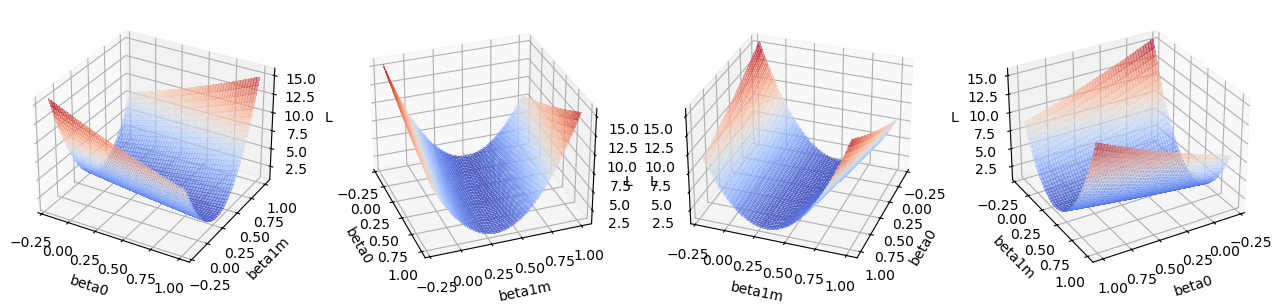

In [15]:
fig = plt.figure(figsize=plt.figaspect(0.25))

for i, az in enumerate([-60, -20, 20, 60]):
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    ax.plot_surface(beta0m, beta1m, L, cmap = cm.coolwarm, antialiased = False, alpha = 0.5)
    ax.set_xlabel('beta0')
    ax.set_ylabel('beta1m')
    ax.set_zlabel('L')
    ax.view_init(elev=30, azim=az)

plt.show()

In [16]:
# get coeffs corresponding to lowest loss
beta1hat = beta1[np.unravel_index(L.argmin(), L.shape)[0]]
beta0hat = beta0[np.unravel_index(L.argmin(), L.shape)[1]]
print(beta0hat, beta1hat)

0.11900000000000027 0.45300000000000057


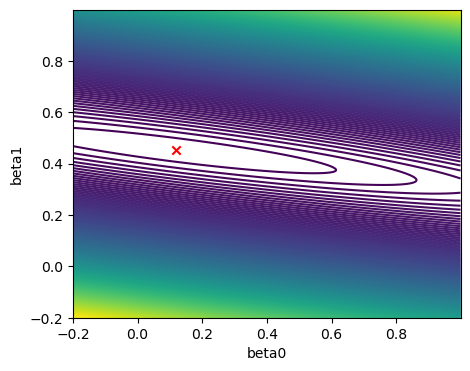

In [17]:
plt.figure(figsize=(5,4))
plt.contour(beta0m, beta1m, L, 200)
plt.scatter(beta0hat, beta1hat, marker='x', c = 'r')
plt.xlabel('beta0')
plt.ylabel('beta1')
plt.show();

## 2. Multivariate Regression

We can conduct linear regression on more than one feature. Here we'll examine it on two, but it can be generalised to higher dimensions

### 2.1. Generate data

This time the data is linear in two features `X1` and `X2` - the data sits around a *plane*, with some noise

In [18]:
np.random.seed(42)
X1 = np.random.uniform(0, 10, n)
X2 = np.random.uniform(0, 10, n)
z = -0.5 * X1 + 1.5 * X2 + np.random.randn(n)

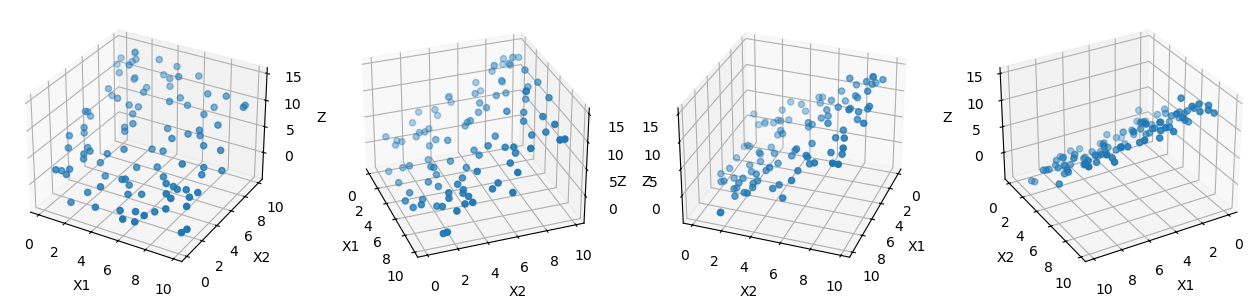

In [19]:
fig = plt.figure(figsize=plt.figaspect(0.25))

for i, az in enumerate([-60, -20, 20, 60]):
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    ax.scatter(X1, X2, z)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Z')
    ax.view_init(elev=30, azim=az)

plt.show()

In [20]:
X = np.concatenate((X1.reshape(-1,1), X2.reshape(-1,1)), axis = 1)

### 2.2. Split data into train and test

In [21]:
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state=42)

### 2.3. Fit model onto training data

In [22]:
model2 = LinearRegression()
model2.fit(X_train, z_train)

LinearRegression()

In [23]:
print(f'Our regression model is y = {model2.intercept_:.3f} + {model2.coef_[0]:.3f} X1 + {model2.coef_[1]:.3f} X2 + \N{GREEK SMALL LETTER EPSILON}')

Our regression model is y = -0.279 + -0.517 X1 + 1.584 X2 + ε


### 2.4. Check results

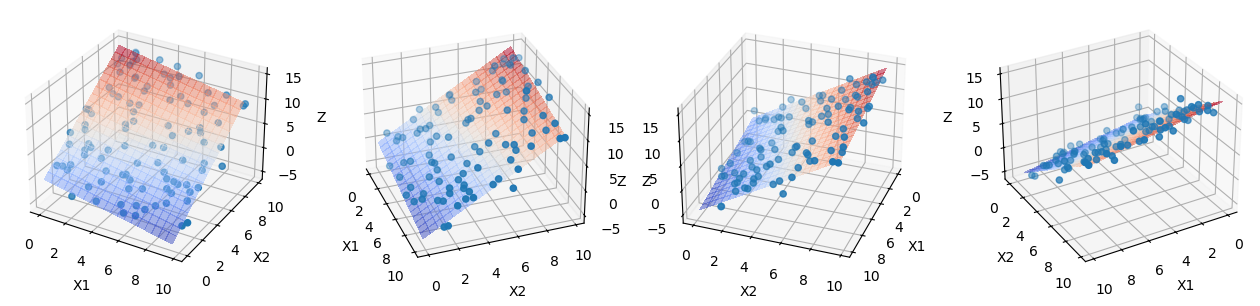

In [24]:
X1_train = X_train[:,0]
X2_train = X_train[:,1]

X1m = np.arange(0,10,0.5)
X2m = np.arange(0,10,0.5)
X1m, X2m = np.meshgrid(X1m, X2m)
zm = model2.intercept_ + model2.coef_[0] * X1m + model2.coef_[1] * X2m


fig = plt.figure(figsize=plt.figaspect(0.25))

for i, az in enumerate([-60, -20, 20, 60]):
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    ax.plot_surface(X1m, X2m, zm, cmap = cm.coolwarm, antialiased = False, alpha = 0.5)
    ax.scatter(X1, X2, z)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Z')
    ax.view_init(elev=30, azim=az)

plt.show()

### 2.5. Evaluate results

In [25]:
z_pred = model2.predict(X_test)
print(root_mean_squared_error(z_pred, z_test))

0.9150241681924147


## 3. Polynomial Regression

Linear Regression is good at capturing linear relationships, between the target variable and features, but is not good at capturing non-linear features:

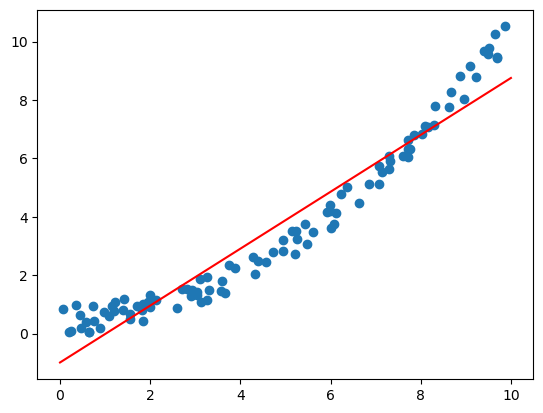

In [26]:
y2 = 0.1 * np.square(x.reshape(-1)) + np.random.rand(n)
model3 = LinearRegression()
model3.fit(x.reshape(-1,1), y2) # Note here I'm using the whole dataset - this is purely for illustration purposes, don't do this in practice!

plt.scatter(x, y2)
plt.plot(np.linspace(0, 10, n), model3.predict(np.linspace(0, 10, n).reshape(-1,1)), c='r');

In [27]:
print(root_mean_squared_error(model3.predict(x), y))

2.1725263811309135


but you can make transformations to create linear features

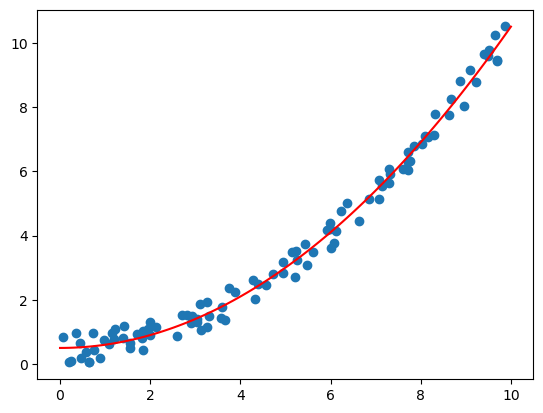

In [28]:
xsquared = np.square(x.reshape(-1))

model4 = LinearRegression()
model4.fit(xsquared.reshape(-1,1), y2)

plt.scatter(x, y2)
plt.plot(np.linspace(0, 10, n), model4.predict(np.square(np.linspace(0, 10, n).reshape(-1,1))), c='r');

In [29]:
print(root_mean_squared_error(model4.predict(x), y))

1.9489008337364826


In reality, what you're doing above is stretching the feature (x) axis in such a way that the data "looks" linear before performing the regression

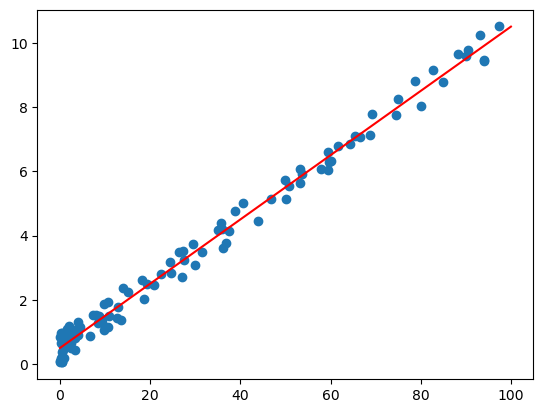

In [30]:
plt.scatter(xsquared, y2)
plt.plot(np.linspace(0, 100, n), model4.predict(np.linspace(0, 100, n).reshape(-1,1)), c='r');

## 4. Open Exercise

Below is a dataset for diabetes. You can read about the Scikit-learn loading method [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) and about the dataset itself [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).

**Tasks**

1. Examine the dataset and its features
2. Split the dataset into train and test, making sure the split is reproducible (*Hint*: this is done somewhere in the upstream code)
3. Perform some EDA - e.g. how does the target variable look against each feature? Can you spot any patterns? What if you split the data by another feature e.g. sex?
4. Perform univariate regression against individual features and evaluate them against the test set
5. Perform multivariate regression against some or all of the features. Which combinations give the best evaluation against the test set?

In [31]:
diabetes = load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target
display(X.head())
y.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64